# 1. Initial Steps

### Load Libraries

In [50]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from matplotlib import pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

### Set Default Values

In [51]:
seed = 12 # 12 ears
y = 'OverallPoF' # target

# 2. Data Prep

### Read Data

In [52]:
col_exclusion = [ 'OAEPoF', 'TympPoF' ]
absorbance = pd.read_csv('Dataset/a_data.csv').drop(columns = col_exclusion)
admittance = pd.read_csv('Dataset/y_data.csv').drop(columns = col_exclusion)
phase = pd.read_csv('Dataset/p_data.csv').drop(columns = col_exclusion)

### Separate Frequencies vs non Frequencies

In [53]:
frequencies = absorbance.filter(regex = r'f.*').columns
nonf_vars = absorbance.drop(columns = frequencies.union([ y ])).columns

### Add prefixes to frequency columns, so we can merge in the next step

In [54]:
def rename_mapping(columns, prefix):
    mapping = { }
    for c in columns:
        mapping[ c ] = prefix + c[ 1 : ]
    return mapping 

absorbance = absorbance.rename(columns = rename_mapping(frequencies, 'fa'))
admittance = admittance.rename(columns = rename_mapping(frequencies, 'fy'))
phase = phase.rename(columns = rename_mapping(frequencies, 'fp'))

### Merge Absorbance, Admittance, and Phase

In [59]:
merged_set = absorbance.merge(right = admittance, on = list(nonf_vars) + [ y ])
merged_set = merged_set.merge(right = phase, on = list(nonf_vars) + [ y ])

In [72]:
merged_set

,Gender,AgeM,ECV,TPP,SC,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,...,fp6168,fp6349,fp6535,fp6727,fp6924,fp7127,fp7336,fp7550,fp7772,fp8000
0,1,116,1.73,1,1.33,8.0,11.0,6.0,12.0,9.0,...,9.4099,42.8827,62.8359,69.0845,71.8799,75.6655,78.1171,80.7457,81.9878,83.4522
1,0,102,1.37,7,0.93,6.0,4.0,7.0,6.0,13.0,...,-69.1540,-70.0810,-69.9377,-63.3156,-60.3155,-55.7958,-46.1032,-8.4691,27.6831,53.5242
2,1,103,1.05,13,0.38,10.0,13.0,9.0,5.0,7.0,...,-79.8836,-79.1053,-77.9840,-69.9974,-66.2573,-61.6720,-52.6068,-7.6018,39.2362,65.0650
3,0,100,0.80,4,0.44,15.0,16.0,19.0,20.0,19.0,...,-28.7733,19.9996,63.2478,70.5852,77.0512,78.2929,79.3843,78.7890,78.6293,78.9199
4,0,117,0.94,0,0.57,19.0,22.0,23.0,17.0,8.0,...,-81.7256,-90.2495,2.6771,82.0313,88.9606,87.0945,86.7331,84.6220,85.1358,85.3328
5,0,110,0.90,1,0.40,11.0,18.0,21.0,17.0,4.0,...,-69.5618,-70.9272,-67.4267,-59.6389,-49.8852,-24.7533,15.0268,43.1414,57.9542,65.5942
6,1,122,0.96,6,0.51,15.0,12.0,15.0,11.0,13.0,...,-87.5945,-86.0508,-87.4289,-85.9990,-78.6846,-71.1719,-13.8517,80.0714,84.5105,93.1457
7,1,117,0.71,3,0.47,21.0,18.0,22.0,15.0,11.0,...,-51.7346,-22.2277,50.3318,80.6503,82.6362,86.7219,87.6202,90.5000,91.0953,93.3113
8,0,121,1.55,8,0.54,16.0,11.0,16.0,8.0,3.0,...,-79.7325,-77.0906,-74.7575,-67.2779,-52.5252,-23.1391,20.7374,52.0204,62.9663,67.2197
9,0,101,0.65,6,0.28,10.3,10.8,17.6,10.7,16.2,...,100.7765,97.3000,97.6728,97.0666,94.8414,94.3537,93.4279,94.3725,94.3917,95.2794


### 80 : 20 Train Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    merged_set.drop(columns = y), # X
    merged_set[ y ], # y
    test_size = 0.2, 
    random_state = seed
)

### Feature Scaling

In [44]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

# 3. Modelling

### All (frequency) For One (model)

In [45]:
def performance_report(
    classifier, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test,
    top = 10
):
    
    print('Performance on Training Set')
    print(classification_report(y_train, classifier.predict(X_train)))
    print('---------------------------------------------------------')
    
    print('Performance on Testing Set')
    print(classification_report(y_test, classifier.predict(X_test)))
    print('---------------------------------------------------------')
    
    coef_plot = pd.Series(
        data = abs(classifier.coef_[ 0 ]), 
        index = classifier.feature_names_in_
    ).nlargest(top).sort_values().plot(kind = 'barh')
    
    coef_plot.set_title('Top-%s Most Contributing Features'%top)
    coef_plot.set_xlabel('Coefficient Weights')

Performance on Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00         1

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

---------------------------------------------------------
Performance on Testing Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

---------------------------------------------------------


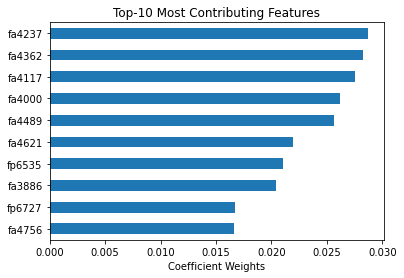

In [46]:
afo_svc = SVC(kernel = 'linear', class_weight = 'balanced', random_state = seed)
afo_svc.fit(X = X_train, y = y_train)

performance_report(classifier = afo_svc)

### AFO with Only Frequencies (OF)

Performance on Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00         1

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

---------------------------------------------------------
Performance on Testing Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

---------------------------------------------------------


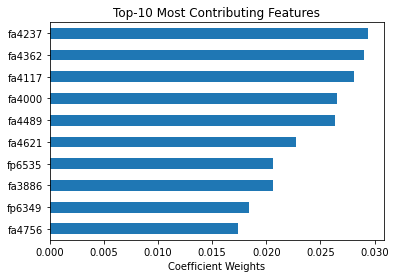

In [12]:
afo_of_svc = SVC(kernel = 'linear', class_weight = 'balanced', random_state = seed)
afo_of_svc.fit(X = X_train.drop(columns = nonf_vars), y = y_train)

performance_report(
    classifier = afo_of_svc,
    X_train = X_train.drop(columns = nonf_vars),
    X_test = X_test.drop(columns = nonf_vars)
)

# 4. Resampling

### Under-sampling with Tomek

In [ ]:
tl = TomekLinks(ratio = 'majority')
X_train_under, y_train_under = tl.fit_sample(X_train, y_train)

In [ ]:
afo_svc_under = SVC(kernel = 'linear', class_weight = 'balanced', random_state = seed)
afo_svc_under.fit(X = X_train_under, y = y_train_under)

performance_report(classifier = afo_svc_under)

In [ ]:
afo_of_svc_under = SVC(kernel = 'linear', class_weight = 'balanced', random_state = seed)
afo_of_svc_under.fit(X = X_train_under.drop(columns = nonf_vars), y = y_train_under)

performance_report(
    classifier = afo_of_svc_under,
    X_train = X_train_under.drop(columns = nonf_vars),
    X_test = X_test_under.drop(columns = nonf_vars)
)

# *WE DONT USE BEYOND THIS POINT*

### One (model) For All (frequency)

In [13]:
model_storage = [ ]

for freq in frequencies:
    freq = freq[ 1 : ]
    ofa_svc = SVC(kernel = 'linear', class_weight = 'balanced', random_state = seed)
    freq_columns = [ prefix + freq for prefix in [ 'fa', 'fy', 'fp' ] ]
    chosen_col = nonf_vars.append(pd.Index(freq_columns))
    
    ofa_svc.fit(X = X_train[ chosen_col ], y = y_train)
    
    model_storage.append({
        'f(Hz)': float(freq[ freq.find('(') + 1 : freq.find(')') ]),
        'model': ofa_svc,
        'train_f1': f1_score(
            y_true = y_train, 
            y_pred = ofa_svc.predict(X_train[ chosen_col ]),
            average = 'macro'
        ),
        'test_f1': f1_score(
            y_true = y_test, 
            y_pred = ofa_svc.predict(X_test[ chosen_col ]),
            average = 'macro'
        )
    })
    
storage_df = pd.DataFrame(
    model_storage, 
    columns = [ 'f(Hz)', 'model', 'train_f1', 'test_f1' ]
)

In [14]:
storage_df.sort_values(by = [ 'test_f1', 'train_f1' ], ascending = False)

,f(Hz),model,train_f1,test_f1
3,29.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,1.000000
4,32.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,1.000000
5,34.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,1.000000
6,36.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,1.000000
7,38.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,1.000000
...,...,...,...,...
105,777.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,1.000000
106,800.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,1.000000
0,22.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,0.470588
1,25.0,"SVC(class_weight='balanced', kernel='linear', ...",1.0,0.470588


Performance on Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00         1

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

---------------------------------------------------------
Performance on Testing Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

---------------------------------------------------------


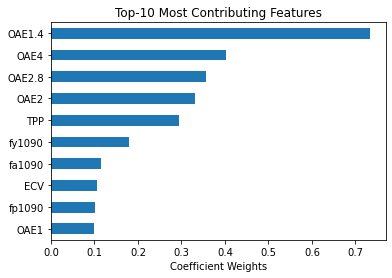

In [15]:
best_idx = 37
best_ofa = storage_df.iloc[ best_idx ][ 'model' ]

performance_report(
    classifier = best_ofa,
    X_train = X_train[ best_ofa.feature_names_in_ ],
    X_test = X_test[ best_ofa.feature_names_in_ ]
)

### OFA with OF

In [16]:
model_storage = [ ]

for freq in frequencies:
    freq = freq[ 1 : ]
    ofa_svc = SVC(kernel = 'linear', class_weight = 'balanced', random_state = seed)
    freq_columns = [ prefix + freq for prefix in [ 'fa', 'fy', 'fp' ] ]
    chosen_col = pd.Index(freq_columns) # only this changed
    
    ofa_svc.fit(X = X_train[ chosen_col ], y = y_train)
    
    model_storage.append({
        'f(Hz)': float(freq[ freq.find('(') + 1 : freq.find(')') ]),
        'model': ofa_svc,
        'train_f1': f1_score(
            y_true = y_train, 
            y_pred = ofa_svc.predict(X_train[ chosen_col ]),
            average = 'macro'
        ),
        'test_f1': f1_score(
            y_true = y_test, 
            y_pred = ofa_svc.predict(X_test[ chosen_col ]),
            average = 'macro'
        )
    })
    
storage_df = pd.DataFrame(
    model_storage, 
    columns = [ 'f(Hz)', 'model', 'train_f1', 'test_f1' ]
)

In [17]:
storage_df.sort_values(by = [ 'test_f1', 'train_f1' ], ascending = False)

,f(Hz),model,train_f1,test_f1
82,400.0,"SVC(class_weight='balanced', kernel='linear', ...",1.000000,1.000000
83,411.0,"SVC(class_weight='balanced', kernel='linear', ...",1.000000,1.000000
84,423.0,"SVC(class_weight='balanced', kernel='linear', ...",1.000000,1.000000
85,436.0,"SVC(class_weight='balanced', kernel='linear', ...",1.000000,1.000000
86,448.0,"SVC(class_weight='balanced', kernel='linear', ...",1.000000,1.000000
...,...,...,...,...
102,712.0,"SVC(class_weight='balanced', kernel='linear', ...",0.601874,0.307692
103,733.0,"SVC(class_weight='balanced', kernel='linear', ...",0.601874,0.307692
105,777.0,"SVC(class_weight='balanced', kernel='linear', ...",0.601874,0.307692
104,755.0,"SVC(class_weight='balanced', kernel='linear', ...",0.575000,0.307692


Performance on Training Set
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.50      1.00      0.67         1

    accuracy                           0.97        34
   macro avg       0.75      0.98      0.83        34
weighted avg       0.99      0.97      0.98        34

---------------------------------------------------------
Performance on Testing Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

---------------------------------------------------------


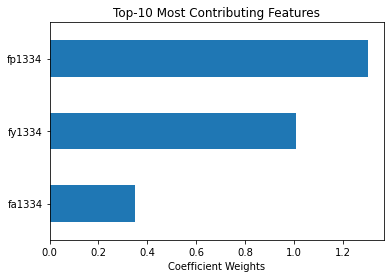

In [18]:
best_idx = 44
best_ofa = storage_df.iloc[ best_idx ][ 'model' ]

performance_report(
    classifier = best_ofa,
    X_train = X_train[ best_ofa.feature_names_in_ ],
    X_test = X_test[ best_ofa.feature_names_in_ ]
)